## I decided to analyze the No-show appointments data set downloaded from Kaggle.
- I used one other reference to complete this project aside from python documentation.
- I used the 3-4 lines of code from Machinelearningmaster.com for the SMOTE analysis. This method was new to me and a useful too that I can use in the future.

In [44]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter

%matplotlib inline

#0 is false, 1 is true

df = pd.read_csv('data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [715]:
df.shape

(110527, 14)

# Exploratory Data Analysis

Here I describe the data. Since all of the variables in this dataset are categorical with the exception of "Age", the descriptive statistics are not too useful. However, for the "Age" variable it is nice to see the descriptive statistics for that variable.

In [716]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Here, the dataset is checked for any null or N/A values. There are no null or missing value present within this dataset.

In [717]:
print(df.isnull().sum(),'\n')
print('The shape of the dataset:',df.shape)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64 

The shape of the dataset: (110527, 14)


In [718]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Normally, I would make a plot matrix of all of the variables. However, this dataset contains all but one categorical variable and the plots are not going to be too illustrative. I save plotting for answering my question further into the analysis.

## Data Cleaning

Below I make two copies of the data, one for exploration and one for training a logistic regression model.

In [4]:
# Make two copies of the data, once for data exploration and graphs, the other copy compatible for
# logistic regression
#Make copies of the data for various parts of the analysis
df_mod_AR = df.copy()
df_copy = df.copy()
df_prac = df.copy()

Below I make the age variable into a categorical data by incorporating age categories using the .cut() method from Pandas and call the resulting variable "Age range". 

In [720]:
age_intervals = [0,18,35,55,75,104]
age_labels = ['0-17','18-34','35-54','55-75','75+']
df_mod_AR['Age range'] = pd.cut(df_mod_AR['Age'],labels=age_labels,bins=age_intervals)

Below I drop the "Age" predictor/variable from the dataset that contains the "Age range" categorical variable.  

In [721]:
df_mod_AR.drop(labels='Age',inplace=True,axis=1)
df_mod_AR.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age range
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,0,0,0,0,No,55-75
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,0,0,0,0,0,No,55-75
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA,0,0,0,0,0,0,No,55-75
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-17
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,1,0,0,0,No,55-75


Below I use the .info() method to see what data type each of the variables in the data set is.

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Below I use the .nunique() method to see how many unique values there are in each variable in the original dataset (remember, I have made a couple of copies and edited one of those copies).

In [723]:
# Find the number of unique values of each variable
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Below I make a bar chart of the different levels of the "Handcap" variable. As can be seen, the representation between the levels is disproportionate.

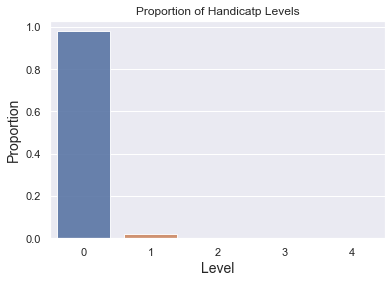

In [724]:
# Make a bar-chart of the percentage of each level of the "Handcap" variable
handcap_counts = df['Handcap'].value_counts()
total_counts = df['Handcap'].value_counts().sum()
handcap_prop = handcap_counts/total_counts
sns.set(style='darkgrid')
sns.barplot(handcap_prop.index,handcap_prop.values,alpha=0.9)
plt.title('Proportion of Handicatp Levels')
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Level',fontsize=14)
plt.show()

I don't believe the "Handcap" variable will be very useful with five different levels with very little representation in the last three levels. In the code cells below, I combine levels "1", "2", "3" and "4" into one category/level.

In [725]:
# Make a dictionary remapping
replacement_map = {0:0,1:1,2:1,3:1,4:1}

In [726]:
# Remap the levels of the "Handcap" variable from 5 levels to only 2 levels
df['Handcap'] = df['Handcap'].map(replacement_map)
print(df['Handcap'].unique())
df.head()

[0 1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [727]:
# Verify that the "Handcap" variable has been mapped to only two levels
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

Now we remake bar chart for "Handcap" variable illustrating the newly made two categories.

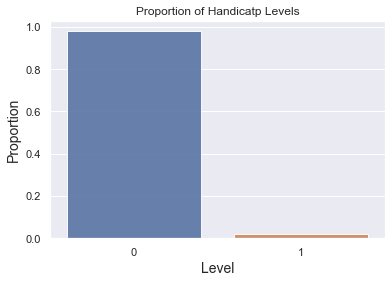

In [728]:
# Make a bar-chart plotting the percentage of the new 2-level "Handcap" variable
handcap_counts = df['Handcap'].value_counts()
total_counts = df['Handcap'].value_counts().sum()
handcap_prop = handcap_counts/total_counts
sns.set(style='darkgrid')
sns.barplot(handcap_prop.index,handcap_prop.values,alpha=0.9)
plt.title('Proportion of Handicatp Levels')
plt.ylabel('Proportion',fontsize=14)
plt.xlabel('Level',fontsize=14)
plt.show()

Below I convert all dates from strings/objects to datetime objects.

In [729]:
# Convert the date-time variables to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Below I verify that all dates have been appropriately converted.

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Below I get the value counts of the age variable. As can be seen there is a value of age that makes no sense: -1. In the cells below, I remove that row with that value.

In [731]:
# See the possible values in the "age" variable
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [732]:
# Get the index of the row with the age of -1 since this isn't possible
neg_index = df[df['Age'] == -1].index
neg_index = df_orig[df_orig['Age'] == -1].index

Below I remove the row with the value of -1 for "Age"

In [733]:
# Drop the row with the age of -1
df.drop(index = neg_index,axis = 0,inplace=True)
df_orig.drop(index = neg_index,axis = 0,inplace=True)

In [734]:
# Verify that the age of -1 has been dropped
df['Age'].value_counts()
df_orig['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Below I remap the No-show variable (the response variable) to the "Present" variable. In the present variable if a patient showed up to the appointment, then they receive the value "Yes" to indicate they were present and receive a value of "No" otherwise.

In [735]:
# The no-show columns confuses me, so let's remap it. This step creates the remap dictionary
present_map = {'No':'Yes','Yes':'No'}

In [736]:
# Remapt the "No-show" variable and call it "Present"
df['Present'] = df['No-show'].map(present_map)

In [737]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes


In [738]:
# Drop the "No-show" variable
df.drop(labels = 'No-show',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Present           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [739]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [740]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Present           0
dtype: int64

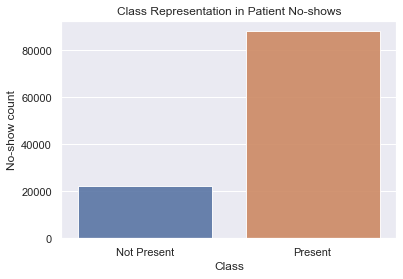

In [741]:
df_present = df[df['Present'] == 'Yes'].shape[0]
df_not_present = df[df['Present'] == 'No'].shape[0]
df_p_np_heights = [df_not_present,df_present]
df_p_np_labels = ['Not Present','Present']
sns.set(style = 'darkgrid')
sns.barplot(df_p_np_labels,df_p_np_heights,alpha = 0.9)
plt.title('Class Representation in Patient No-shows')
plt.xlabel('Class')
plt.ylabel('No-show count')
plt.show()

In [742]:
print('the first day included in this dataset is:',df['AppointmentDay'].min())
print('The last day included in this dataset is: ',df['AppointmentDay'].max())

the first day included in this dataset is: 2016-04-29 00:00:00+00:00
The last day included in this dataset is:  2016-06-08 00:00:00+00:00


In [743]:
df_orig = df.copy()

## This concludes the data-cleaning portion of the analysis.

# Question 1: Which feature is the most statistically significant in the logistic regression model for "No-show"

I will answer this question by using the statistical model known as "logistic regression". The logistic regression model relateds the logit of the odds of a binary classification variable to a linear function of the predictor variables. This model is frequently used a "baseline" or "benchmark". So, naturally, this model is a good place to start if one wishes to get a sense of what the relationship between the response and predictor variables is.

In [744]:
df_model = df.copy()

In [745]:
# One-hot encode the present variable
df_model[['Present','Not-Present']] = pd.get_dummies(df['Present'])

In [746]:
# Drop the "Not-present" variable made above since "Present" contains all the information regarding a patient
# not showing up to their appointment
df_model.drop(labels='Not-Present',inplace=True,axis=1)

In [747]:
# One-hot encode the "Gender" variable
df_model[['Male','Female']] = pd.get_dummies(df['Gender'])

In [748]:
df_model.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present,Male,Female
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0


In [749]:
# Drop the "Gender" and "Female" variables since all information about gender can be 
# extracted from the "Male" variable

# In the male variable, 1 means that the patient is male, 0 means that the patient is female.
labels_to_drop = ['Gender','Female']
df_model.drop(labels=labels_to_drop,inplace=True,axis=1)
df_model.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present,Male
0,2.987250e+13,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,5.589978e+14,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,8.679512e+11,5642828,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8.841186e+12,5642494,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1


In [750]:
# Make intercept column for logistic regression
df_model['intercept'] = 1
X = df_model.loc[:,['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','Male',
              'intercept']]

In [751]:
X.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Male,intercept
0,62,0,1,0,0,0,0,1,1
1,56,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1,1
3,8,0,0,0,0,0,0,1,1
4,56,0,1,1,0,0,0,1,1


In [752]:
X.shape

(110527, 9)

In [753]:
# Map the response of the logistic regression to the "Present" variable
y = df_model.loc[:,['Present']]

In [754]:
y.head()

,Present
0,0
1,0
2,0
3,0
4,0


In [755]:
y = y.to_numpy()
y.shape

(110527, 1)

In [756]:
print(type(y))

<class 'numpy.ndarray'>


In [757]:
# The summary tells us that the most statistically significant variables
# are SMS-received and Age.
log_mod = sm.Logit(y,X)
results  = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 292.344681
         Iterations 6


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110518
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                     inf
Time:                        21:27:38   Log-Likelihood:            -3.2312e+07
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0066      0.000    -16.729      0.000      -0.007      -0.006
Scholarship      0.1844      0.025      7.523      0.000       0.136       0.232
Hipertension    -0.0678      0.025     -2.756      0.006      -0.116      -0.020
Diabetes         0.0853      0.034      2.501      0.012       0.018       0.152
Alcoholism       0.1400      0.045      3.126      0.002       0.052       0.228
Handcap          0.0238      0.056      0.424      0.672      -0.086       0.134
SMS_received     0.6498      0.015     42.003      0.000       0.620       0.680
Male             0.0181      0.016      1.112      0.266      -0.014       0.050
intercept       -1.4024      0.018    -78.227      0.000      -1.437      -1.367
================================================================================
"""

# Side-note: Question 1 
 
As can be seen from the plot in the data cleaning section, there is a significant class imbalance in the response variable "Present" or just the patient no-shows. This could be affecting our McFadden's R-squared value which has a value of "infinity" which is a bit ominous about our model. The SMOTE procedure will synthesize new examples of the minority class (in our case no-shows) to balance the classes. This will hopefully do two things for our model:
- Produce a finite Pseudo R-squared value.
- Alter the statistical significance of the predictor variables.

In [758]:
#Apply the SMOTE procedure to the predictors and response variable
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

In [759]:
#Recount the number of instances in the classes.
counter = Counter(y)
print(counter)

Counter({0: 88208, 1: 88208})


In [760]:
#Display the y variable
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [761]:
#Use the sum command to tally the number of absent patients
y.sum()

88208

In [762]:
#Fit a new logistic regression model to the data with extra SMOTE instances.
log_mod = sm.Logit(y,X)
results  = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 22.359483
         Iterations 5


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               176416
Model:                          Logit   Df Residuals:                   176407
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:                     inf
Time:                        21:27:44   Log-Likelihood:            -3.9446e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0058      0.000    -22.862      0.000      -0.006      -0.005
Scholarship      0.1101      0.016      6.754      0.000       0.078       0.142
Hipertension    -0.0412      0.016     -2.636      0.008      -0.072      -0.011
Diabetes        -0.0874      0.022     -3.929      0.000      -0.131      -0.044
Alcoholism      -0.2834      0.032     -8.963      0.000      -0.345      -0.221
Handcap         -0.5437      0.042    -13.091      0.000      -0.625      -0.462
SMS_received     0.6172      0.010     61.035      0.000       0.597       0.637
Male            -0.0045      0.010     -0.433      0.665      -0.025       0.016
intercept        0.0053      0.012      0.459      0.647      -0.017       0.028
================================================================================
"""

# Discussion: Question 1

The results from the logistic regression models show that the "SMS_received" and "Age" variables are the most statistically significant due to their z-statistics having the largest absolute value. This means that there is a relationship between the variables "SMS_received", "Age" and a patient showing up to their appointment. Since those variables have the largest absolute value, a natural part of the analysis would begin with looking at those variables and their relationship to the  "Present" variable. With that being said, the McFadden's R-squared is awfully suspicious in this logistic regression models since the value is infinity and it should be between [0,1]. I have made every attempt to check the data and the model to verify that no user error occurred when implementing the model or cleaning the data. The issue, I believe, is the dataset since the warning above indicates an uninvertible Hessian matrix. I will assume that 'Age' and 'SMS_received' are the strongest predictors of the group from this model. Future analysis that I would like to do would be to fit a decision tree, calculate the AUC from the ROC curve and get the most important predictors from the tree based model since decisions tree are highly interpretable.

The fact that the Hessian matrices are invertible in the logistic regression model show that the analysis using the logistic regression model is limited, but this can be mitigated using other interpretable statistical or machine learning techniques such as decision trees.

## Question 2: Does a difference in gender heavily impact the probability of a "no-show"

This question was more less for fun and bases off of a hunch. My guess is that women will tend to be more punctual when it comes to their doctor's appointments. For this portion of the analysis I decided to pull observations/samples that were of either gender and absent to their appointment. I then decided to plot the proportion of the different gendered no-shows in a barplot. As can be seen from my analysis, I was incorrect.

In [763]:
df_orig.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [764]:
df_orig['Present'].shape

(110527,)

In [765]:
# Calculate the total number of no-shows
total_no_shows = df_orig[df_orig['Present']=='No']
num_total_NS = total_no_shows.shape[0]

In [766]:
# Calculate the total number of no-shows that are male
male_NS = df_orig[(df_orig['Gender'] == 'M') & (df_orig['Present'] == 'No')]
num_male_NS = male_NS.shape[0]

In [767]:
# Calculate the total number of no-shows that are female
female_NS = df_orig[(df_orig['Gender'] == 'F') & (df_orig['Present'] == 'No')]
num_female_NS = female_NS.shape[0]

In [768]:
# Calculate the percentage of no-shows that are male and female
male_NS_prop = num_male_NS / num_total_NS
female_NS_prop = num_female_NS / num_total_NS

In [769]:
print(male_NS_prop,female_NS_prop)

0.346117657601147 0.653882342398853


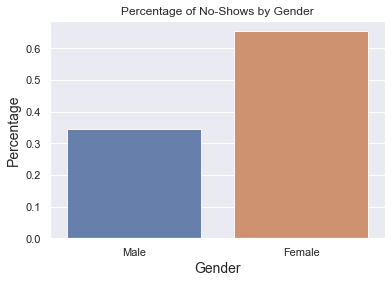

In [653]:
# Make a bar-chart graphing plotting the difference in percentage in male and female no-shows

#This graph shows us that the women are nearly twice as likely to not show up for an appointment
categories = ['Male','Female']
cat_heights = [male_NS_prop,female_NS_prop]
sns.set(style='darkgrid')
sns.barplot(categories,cat_heights,alpha=0.9)
plt.title('Percentage of No-Shows by Gender')
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Gender',fontsize=14)
plt.show()

# Discussion: Question 2

As can be seen from the bar-chart there is about double the number of women who miss their appointments as when compared to men. This doesn't mean that women will always miss their appointment at twice the rate as that of men, but it does mean that in this sample of patients women were twice as likely to miss their appointments. One thing that could be done to mitigate the difference in gender no-shows is to tentatively overbook appointments with female patients with patients who need to reschedule. This way, the patients who need to reschedule have a chance at an earlier appointment but know that the rescheduled appointment is tentative. However, this would need to be implemented once further analysis on more data is complete.

## Question 3: Is age an indicator in whether a patient will show up or not?

In this portion of the analysis I decided to determine if age had an association with patient absentees or not. I decided to calculate the descriptive statistics and then query the data above and below the first, median and third quartile. Afterwards, I pulled only those samples that were absent from their apppointments. I think this method of analysis is justified because I am effectively seeing what portion of absent patients were "young", "middle-aged" and "older". In the first few lines of the analysis presented for question 3 I decided to split up the "Age" variable into age groups to see how the ages of the patients were distributed, but only for this purpose.

In [654]:
desc_stats_df_orig = df_orig.describe()
df_orig.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


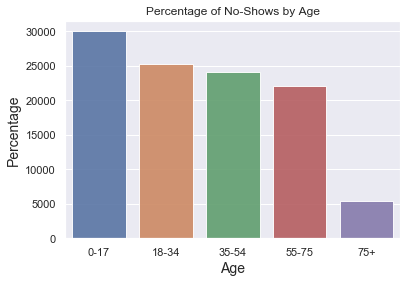

In [655]:
#Make a bar-chart counting all the age-ranges
age_range_heights = df_mod_AR['Age range'].value_counts()
age_labels = ['0-17','18-34','35-54','55-75','75+']
sns.set(style='darkgrid')
sns.barplot(age_labels,age_range_heights,alpha=0.9)
plt.title('Percentage of No-Shows by Age')
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.show()

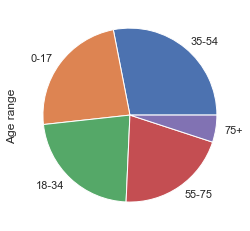

In [656]:
#Make a bar-chart of all the age-ranges
age_range_heights.plot(kind='pie')

In [657]:
age_median = desc_stats_df_orig.loc['50%']['Age']
below_med = df_orig.query('Age < {}'.format(age_median))
above_med = df_orig.query('Age > {}'.format(age_median))
above_med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,Yes


In [658]:
below_med = below_med[below_med['Present']=='No']
above_med = above_med[above_med['Present']=='No']
below_med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,No
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,No
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No
21,1.215484e+13,5628338,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,No


In [659]:
total_no_shows = below_med.shape[0] + above_med.shape[0]
print('The number of absentees below the median is:',below_med.shape[0])
print('The number of absentees above the median is:',above_med.shape[0])

The number of absentees below the median is: 12444
The number of absentees above the median is: 9558


In [660]:
#The percentage of absintees above the median age is given by the below code
print('The percentage of absentees above the median age is: {}%'.format(above_med.shape[0] *100 / total_no_shows))

The percentage of absentees above the median age is: 43.44150531769839%


In [661]:
#The percentage of absintees below the median age is given by the below code
print('The percentage of absentees below the median age is: {}%'.format(below_med.shape[0] *100 / total_no_shows))

The percentage of absentees below the median age is: 56.55849468230161%


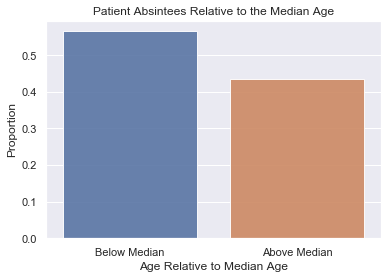

In [662]:
below_med_prop = below_med.shape[0] / total_no_shows
above_med_prop = above_med.shape[0] / total_no_shows
above_below_heights = [below_med_prop,above_med_prop]
height_labels = ['Below Median','Above Median']
sns.set(style = 'darkgrid')
sns.barplot(height_labels,above_below_heights,alpha = 0.9)
plt.title('Patient Absintees Relative to the Median Age')
plt.xlabel('Age Relative to Median Age')
plt.ylabel('Proportion')
plt.show()

The number of absintees below the first quartile is: 5997
The number of absintees above the first quartile is: 15972


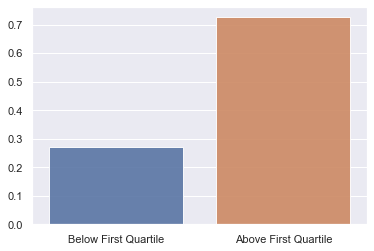

In [663]:
first_quartile_age = desc_stats_df_orig.loc['25%']['Age']
below_fq_age = df_orig.query('Age < {}'.format(first_quartile_age))
above_fq_age = df_orig.query('Age > {}'.format(first_quartile_age))
below_fq_age = below_fq_age[below_fq_age['Present'] == 'No']
above_fq_age = above_fq_age[above_fq_age['Present'] == 'No']
print('The number of absintees below the first quartile is:',below_fq_age.shape[0])
print('The number of absintees above the first quartile is:',above_fq_age.shape[0])
below_fq_age_prop = below_fq_age.shape[0] / total_no_shows
above_fq_age_prop = above_fq_age.shape[0] / total_no_shows
above_below_props = [below_fq_age_prop,above_fq_age_prop]
props_labels = ['Below First Quartile','Above First Quartile']
sns.set(style = 'darkgrid')
sns.barplot(props_labels,above_below_props,alpha = 0.9)
plt.show()

The number of absentees below the third quartile is:  0.8071538951004454
The number of absentees above the third quartile is:  0.1955731297154804


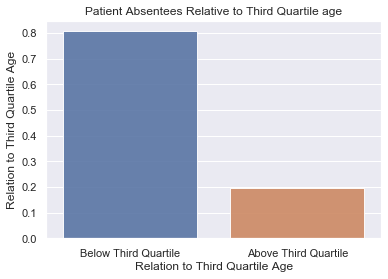

In [664]:
third_quartile_age = desc_stats_df_orig.loc['75%']['Age']
below_tq_age = df_orig.query('Age < {}'.format(third_quartile_age))
above_tq_age = df_orig.query('Age > {}'.format(third_quartile_age))
below_tq_age = below_tq_age[below_tq_age['Present'] == 'No']
above_tq_age = above_tq_age[above_tq_age['Present'] == 'No']
print('The number of absentees below the third quartile is: ',below_tq_age.shape[0]/total_no_shows)
print('The number of absentees above the third quartile is: ',above_tq_age.shape[0]/total_no_shows)
below_tq_age_prop = below_tq_age.shape[0] / total_no_shows
above_tq_age_prop = above_tq_age.shape[0] / total_no_shows
above_below_props = [below_tq_age_prop,above_tq_age_prop]
prop_labels = ['Below Third Quartile','Above Third Quartile']
sns.set(style = 'darkgrid')
sns.barplot(prop_labels,above_below_props,alpha = 0.9)
plt.title('Patient Absentees Relative to Third Quartile age')
plt.xlabel('Relation to Third Quartile Age')
plt.ylabel('Relation to Third Quartile Age')
plt.show()

# Discussion: Question 3

As can be seen there are three bar-plots from the code-cells above for this question. The first bar-plot is the most illuminating since the proportions are the most different from a 50/50 split (since we're talking about the median). That bar plot tells us that if you are below the age of 37 then you are about 13% more likely to miss the appointment. Again, this may not be true IN GENERAL, but it is true for this sample of patients and POTENTIALLY true for the population.

# Question 4: Since 'SMS_received' is the most statistically significant variable, what percentage of 'No-shows' received the SMS message?

In question 4 of the analysis I decided to pull observations that were both present and not present to their appointments. I then made two pie-charts that illustrateds what percentage of those patients received or didn't receive a reminder SMS message. The conclusions can be seen at the discussion portion of this question.

In [6]:
df_prac['ScheduledDay'] = pd.to_datetime(df_prac['ScheduledDay'])
df_prac['AppointmentDay'] = pd.to_datetime(df_prac['AppointmentDay'])

In [25]:
(df_prac['No-show'] == 'No').tolist()

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 Tr

In [45]:
df_prac['Present'] = np.where(df_prac['No-show'] == 'No', 'Yes', 'No')

In [48]:
df_prac.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Present
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,Yes
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,No
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,No
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,Yes
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,Yes


In [49]:
df_prac['Present'].value_counts()

Yes    88208
No     22319
Name: Present, dtype: int64

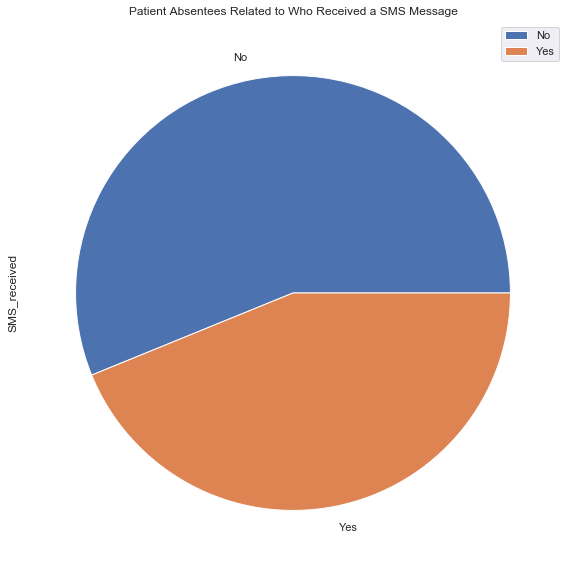

In [50]:
pd.set_option('mode.chained_assignment', None)
df_age_and_NS = df_prac[df_prac['Present'] == 'No']
df_age_and_NS.head()
SMS_remap = {0:'No',1:'Yes'}
df_age_and_NS['SMS_received'] = df_age_and_NS['SMS_received'].map(SMS_remap)
df_age_and_NS['SMS_received'].value_counts().plot(kind='pie',legend=True,figsize=(10,10))
plt.title('Patient Absentees Related to Who Received a SMS Message')
plt.show()

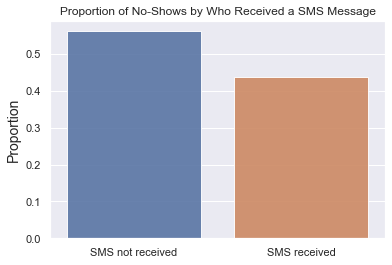

In [52]:
# About a 12% more likely for a patient no-show/absence if the SMS was not received
age_labels = ['SMS not received','SMS received']
total_NS = df_age_and_NS.shape[0]
total_NS
df_age_NS = df_age_and_NS['SMS_received'].value_counts() / total_NS
df_age_NS
sns.set(style='darkgrid')
sns.barplot(x=age_labels,y=df_age_NS,alpha=0.9)
plt.title('Proportion of No-Shows by Who Received a SMS Message')
plt.ylabel('Proportion',fontsize=14)
plt.show()

In [53]:
pd.set_option('mode.chained_assignment', None)
df_age_and_present = df_prac[df_prac['Present'] == 'Yes']
df_age_and_present['SMS_received'] = df_age_and_present['SMS_received'].map(SMS_remap)

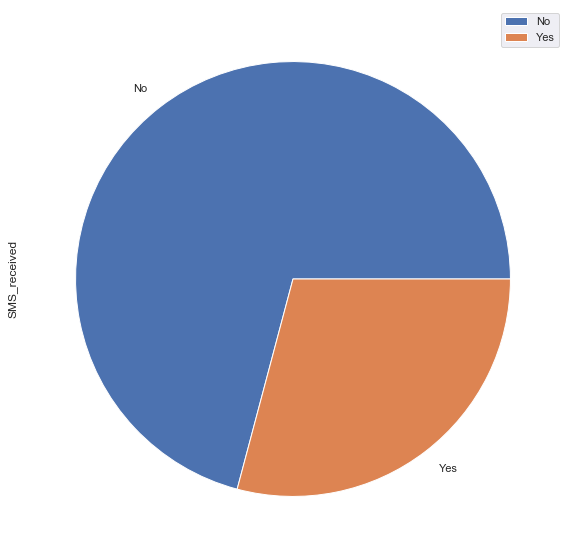

In [54]:
df_age_and_present['SMS_received'].value_counts().plot(kind='pie',legend=True,figsize=(10,10))
plt.show()

# Discussion: Question 4

It appears that for patients that DID show up to the appointment receving a SMS message did not encourage patients to come to the appointment. NOTE: this does not imply that there is no relation between receiving a SMS message and a patient coming to their appointment - as you can see the vast majority of attendees did not receive a message. That is the relationship. I am saying though, that receiving a SMS message did not encourage punctual patients to attend their meeting. Now, patients who did not show up to their appointments were 12% more likely to have not received a SMS message. So perhaps, increasing the amount of SMS messages going to patients will encourage patients who would ordinarily not show to their apointment, to show up.

# Question 5: Is there a day that seems to be the most missed by patients? If so, which day(s)?

For question 5 I pulled all the no-shows according to which day of the week they had an appointment on. Afterwards, I gave a plot giving the proportions of no-shows by day of the week. This is a reasonable method of analysis (with the given data) because it illustrates how patient no-shows were distribtued amongst all the days of the week for all of the no-shows in this dataset. So, therefore it effectively caculates a probability distribution by that is based off of the entire dataset. The conclusions are discussed in the discussion section for this question.

In [671]:
df_prac['ScheduledDay'] = pd.to_datetime(df_prac['ScheduledDay'])
df_prac['AppointmentDay'] = pd.to_datetime(df_prac['AppointmentDay'])

In [672]:
df_prac.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present,Age range,Day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,0,0,0,0,Yes,55-75,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,0,0,0,0,0,Yes,55-75,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,0,0,0,0,0,0,Yes,55-75,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,0-17,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,1,0,0,0,Yes,55-75,4


In [673]:
df_prac['Day'] = pd.DatetimeIndex(df_prac['AppointmentDay']).weekday
#day_remap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday'}
#df_prac['Day'] = df_prac['Day'].map(day_remap)
df_prac.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Present,Age range,Day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,0,0,0,0,Yes,55-75,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,0,0,0,0,0,Yes,55-75,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,0,0,0,0,0,0,Yes,55-75,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,0-17,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,1,0,0,0,Yes,55-75,4


In [674]:
df_day = df_prac[df_prac['Present']=='No']

In [675]:
day_heights = df_day['Day'].value_counts().sort_index()
total_cancellations = day_heights.sum()

In [676]:
day_prop = day_heights / total_cancellations
day_prop = day_prop.sort_index()

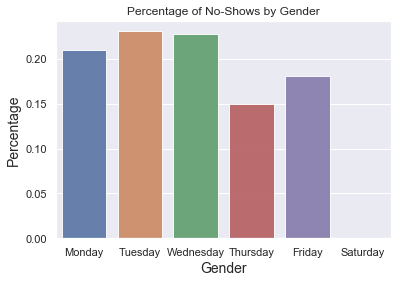

In [677]:
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.set(style='darkgrid')
sns.barplot(day_labels,day_prop[:],alpha=0.9)
plt.title('Percentage of No-Shows by Day')
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Gender',fontsize=14)
plt.show()

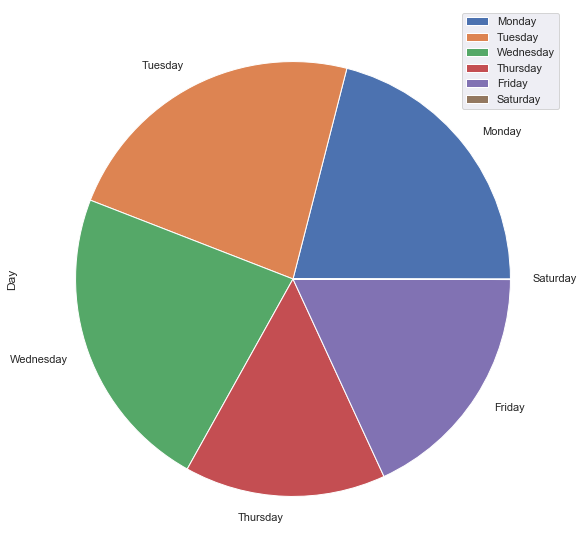

Monday       0.210135
Tuesday      0.230835
Wednesday    0.228191
Thursday     0.149559
Friday       0.180877
Saturday     0.000403
Name: Day, dtype: float64

In [678]:
day_prop.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#day_prop = day_prop.map(day_remap)
day_prop.plot(kind='pie',legend=True,figsize=(10,10))
plt.show()
day_prop

# Discussion: Question 5

The majority of the no-show appointments tended to be earlier in the week, namely, Monday, Tuesday and Wednesday.

# Discussion
This particular dataset included 110527 observations that included the timeframe between April and June 2016 and is a little less than two months of data. This is not a good representation of the population since the time interval is pretty small and likely doesn't inclue all of the patients that this particular organization sees. It's been said that the analsysis is only as good as the data that's given. In order for more rigorous analysis, it would not be unreasonable to request 4-5 years of data. The results presented in this study should be taken as a preliminary step to a larger study over more data. Additionally, this study presented analysis on the effects of certain categories and their relation to absent patients. In future studies of this data it would be of great benefit to perform rigorous hypothesis/statistical tests to quantitatively determine the importance of a variable and its relationship to the patient absences.